In [1]:
import os, sys
import matplotlib.pyplot as plt
import xarray as xr

import cartopy.crs as ccrs
import matplotlib as mpl


In [2]:
bathyFile = '/mnt/BK01/mom6/bathy/gebco/GEBCO_2020.nc'

In [3]:
if os.path.isfile(bathyFile):
    ds_disk = xr.open_dataset(bathyFile)
else:
    ds_disk = xr.Dataset()

In [4]:
ds_disk

<xarray.Dataset>
Dimensions:    (lat: 43200, lon: 86400)
Coordinates:
  * lon        (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat        (lat) float64 -90.0 -89.99 -89.99 -89.99 ... 89.99 89.99 90.0
Data variables:
    elevation  (lat, lon) int16 ...
Attributes:
    Conventions:  CF-1.6
    title:        The GEBCO_2020 Grid - a continuous terrain model for oceans...
    institution:  On behalf of the General Bathymetric Chart of the Oceans (G...
    source:       The GEBCO_2020 Grid is the latest global bathymetric produc...
    history:      Information on the development of the data set and the sour...
    references:   DOI: 10.5285/a29c5465-b138-234d-e053-6c86abc040b9
    comment:      The data in the GEBCO_2020 Grid should not be used for navi...
    node_offset:  1.0

In [5]:
# Slices are on the actual values, not grid cells
elev = ds_disk.elevation.sel(lon=slice(-37.5, -9.9), lat=slice(80.0, 84.0))

In [6]:
elev

<xarray.DataArray 'elevation' (lat: 960, lon: 6624)>
[6359040 values with dtype=int16]
Coordinates:
  * lon      (lon) float64 -37.5 -37.49 -37.49 -37.49 ... -9.91 -9.906 -9.902
  * lat      (lat) float64 80.0 80.01 80.01 80.01 ... 83.99 83.99 83.99 84.0
Attributes:
    standard_name:       height_above_reference_ellipsoid
    long_name:           Elevation relative to sea level
    units:               m
    sdn_parameter_urn:   SDN:P01::BATHHGHT
    sdn_parameter_name:  Sea floor height (above mean sea level) {bathymetric...
    sdn_uom_urn:         SDN:P06::ULAA
    sdn_uom_name:        Metres

In [7]:
# REF: http://meteo.unican.es/work/xarray_seminar/xArray_seminar.html

Text(0.5, 1.0, 'GEBCO 2020 Bathymetry; cartopy 10m coastline')

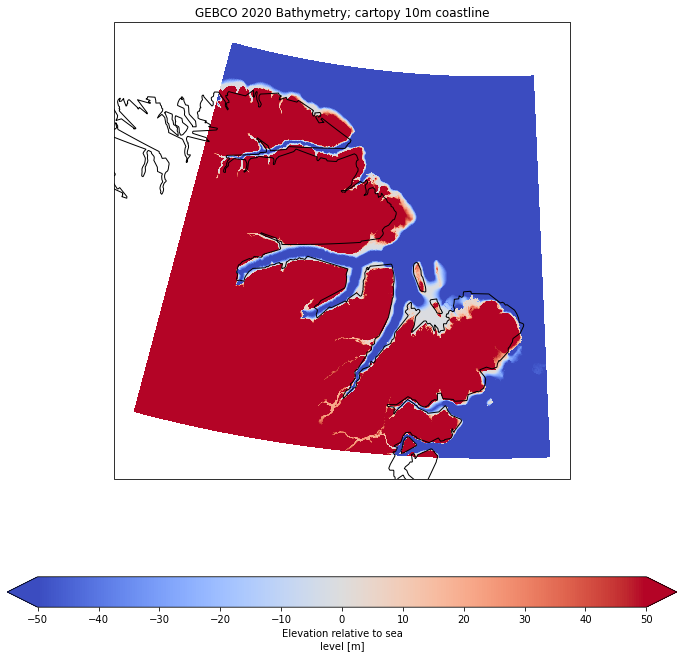

In [8]:

plt.figure(figsize=(12,12))

cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=50, vmax=-50)

#fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#             cax=ax, orientation='horizontal', label='Some Units')

elevLev = [-50.0, -40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0]

p = elev.plot(subplot_kws=dict(projection=ccrs.LambertConformal(central_longitude=-13.8)), transform=ccrs.PlateCarree(),
              cbar_kwargs={'ticks': elevLev, 'orientation': 'horizontal'}, norm=norm, cmap=cmap)

#p.axes.coastlines(resolution='110m')
p.axes.coastlines(resolution='10m')

f = p.get_figure()
ax = f.get_axes()
ax[0].set_title('GEBCO 2020 Bathymetry; cartopy 10m coastline')
